In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('StudentsPerformance.csv')
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
data.shape

(1000, 8)

In [4]:
data.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

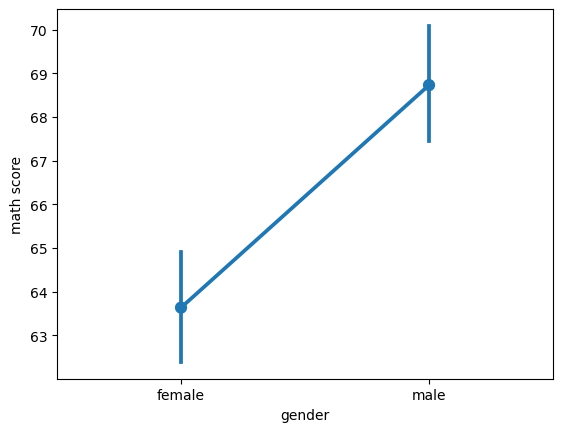

In [27]:
sns.pointplot(x= 'gender', y='math score', data= data)
plt.show()

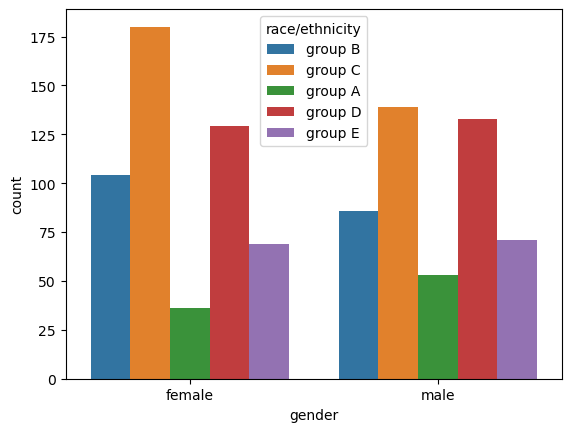

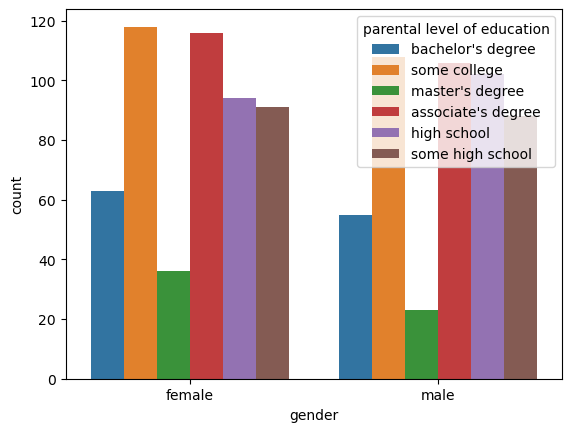

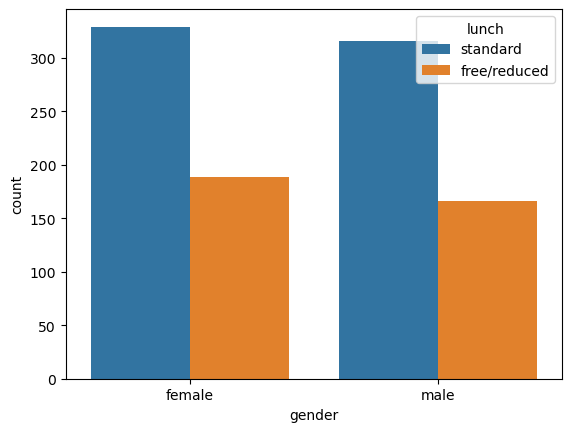

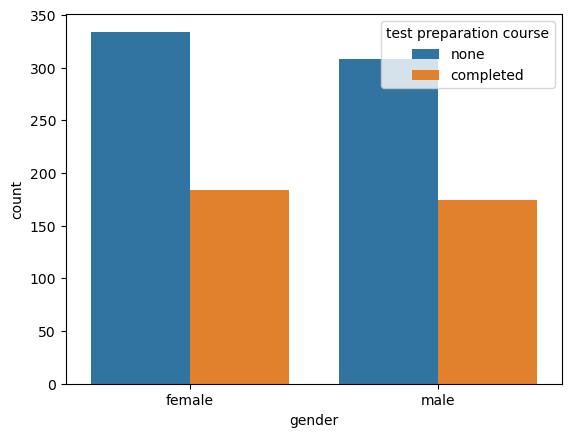

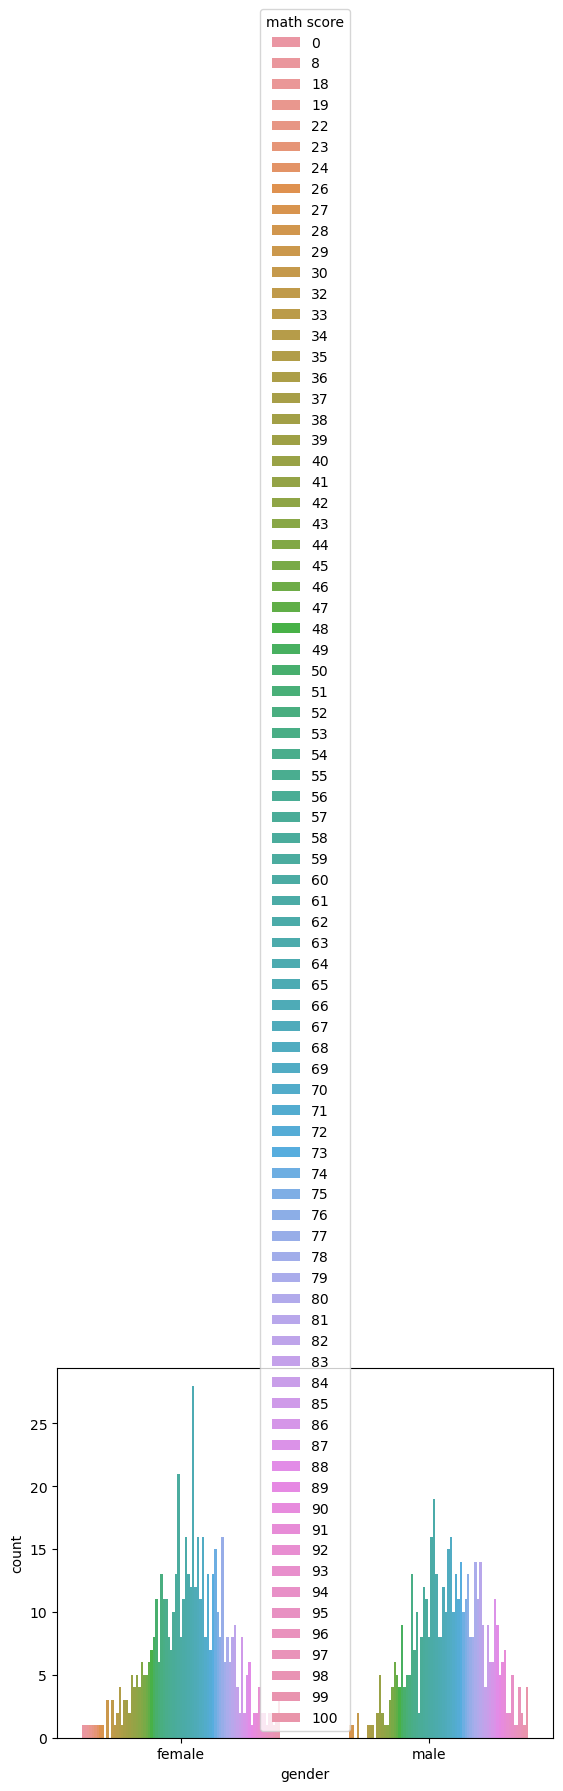

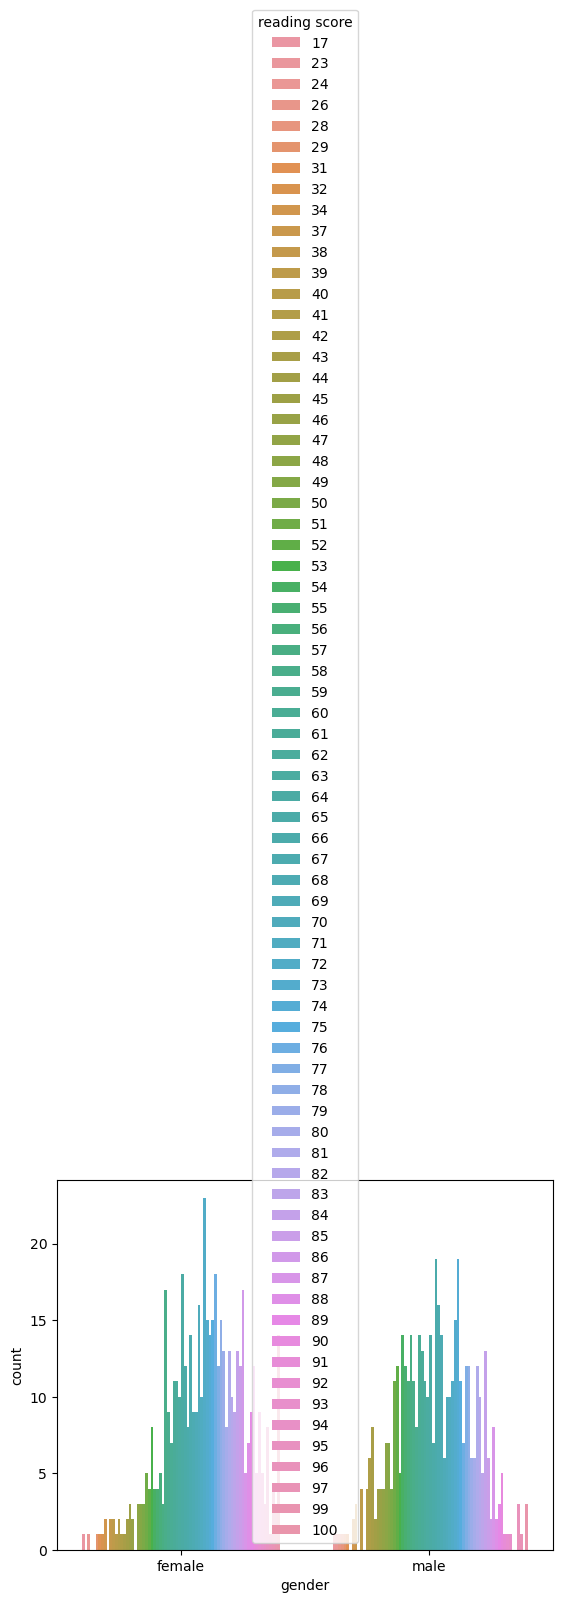

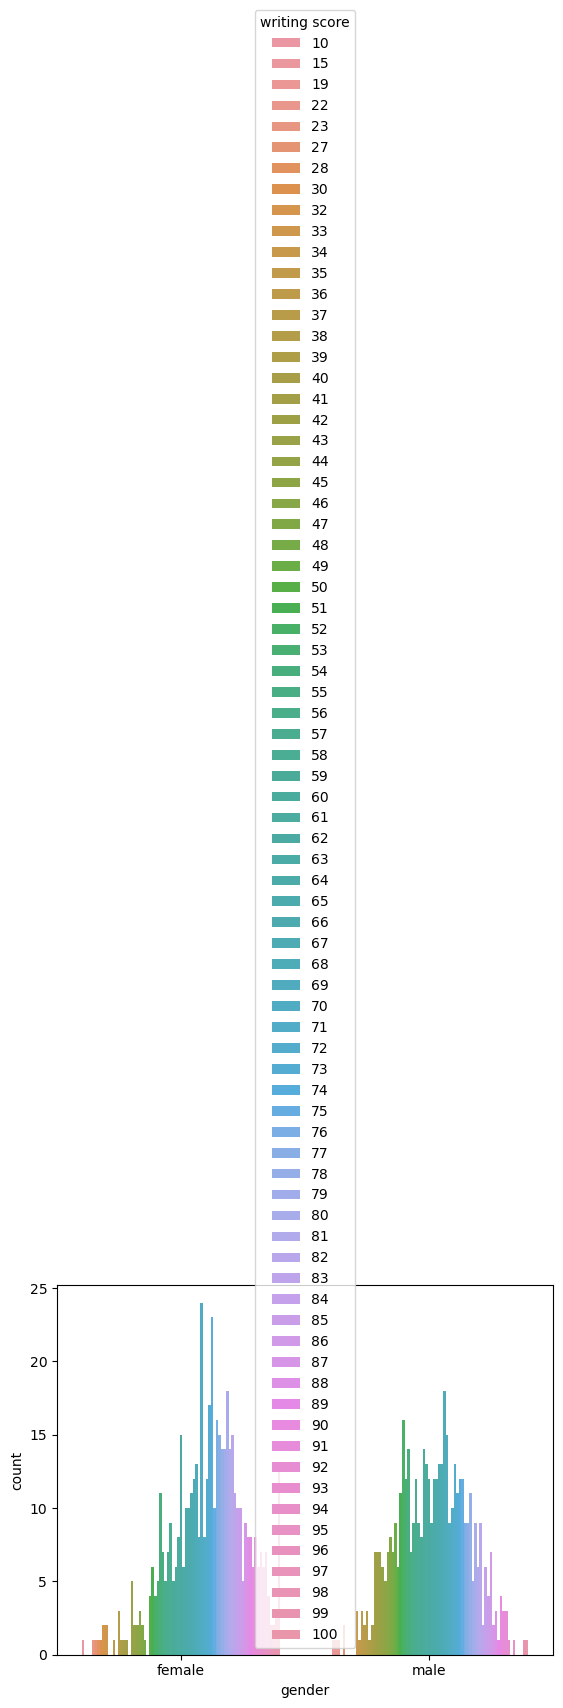

In [36]:
for col in data.columns:
    if col != 'gender':
        plt.figure()
        sns.countplot(x='gender', hue=col, data=data)
        plt.show()

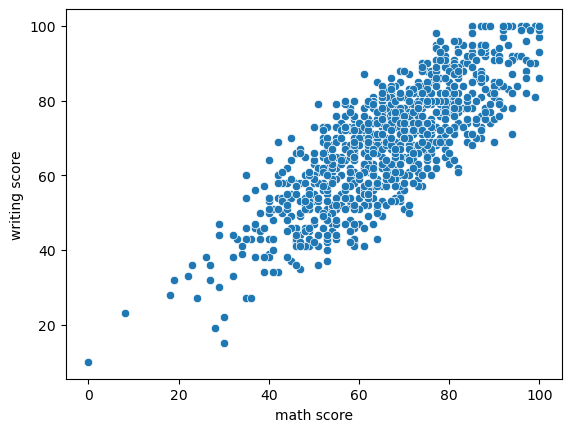

In [24]:
sns.scatterplot(x='math score', y= 'writing score', data= data)
plt.show()

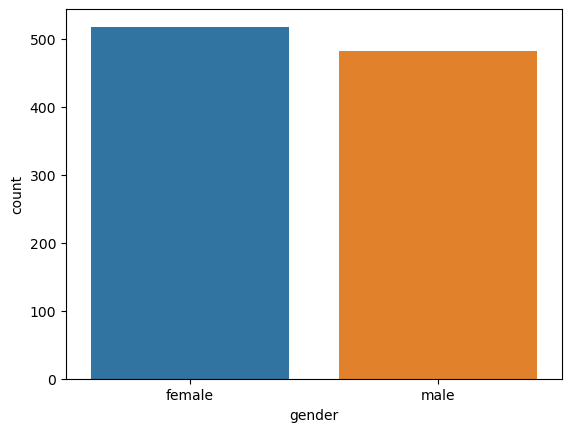

In [19]:
sns.countplot(x= 'gender' ,data= data)
plt.show()

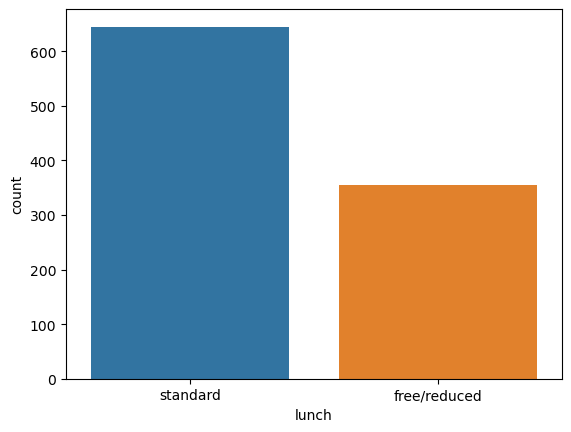

In [22]:
sns.countplot(x= 'lunch' ,data= data)
plt.show()

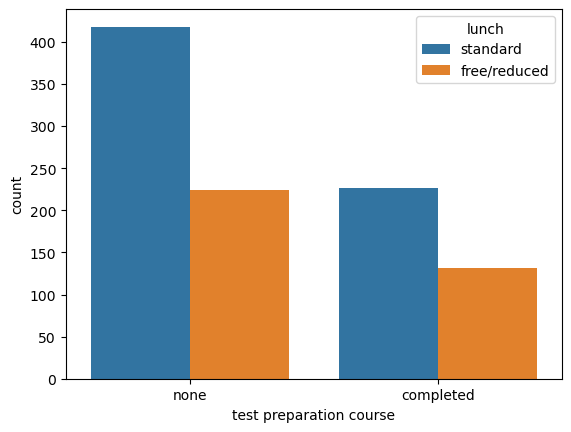

In [23]:
sns.countplot(x= 'test preparation course', hue = 'lunch',data = data)
plt.show()

In [6]:
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


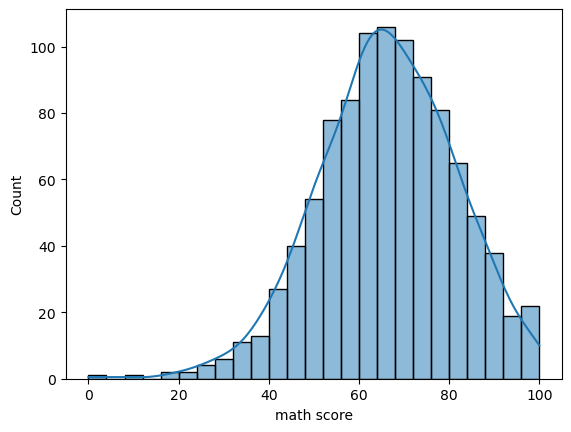

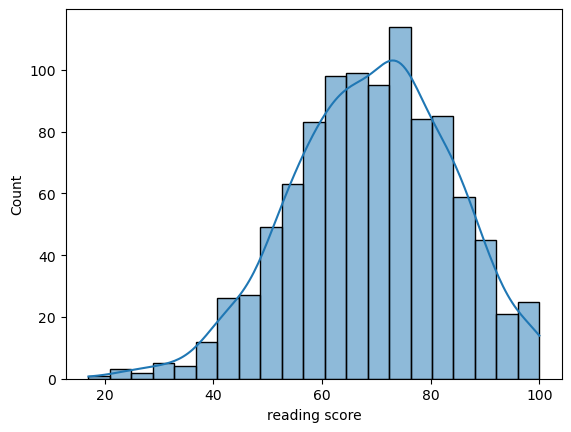

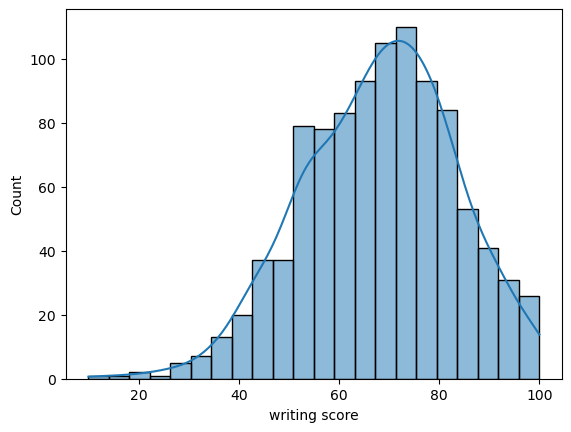

In [6]:
sns.histplot(data=data, x='math score', kde=True)
plt.show()

sns.histplot(data=data, x='reading score', kde=True)
plt.show()

sns.histplot(data=data, x='writing score', kde=True)
plt.show()

In [8]:
correlation =data.corr()

C:\Users\francis mawutor\AppData\Local\Temp\ipykernel_5548\286115690.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation =data.corr()


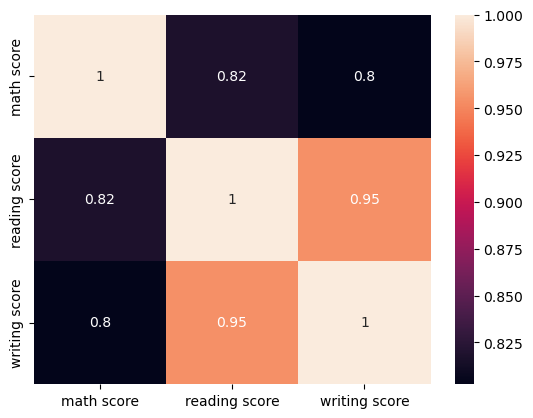

In [11]:
sns.heatmap(correlation,annot = True,cbar = True)
plt.show()

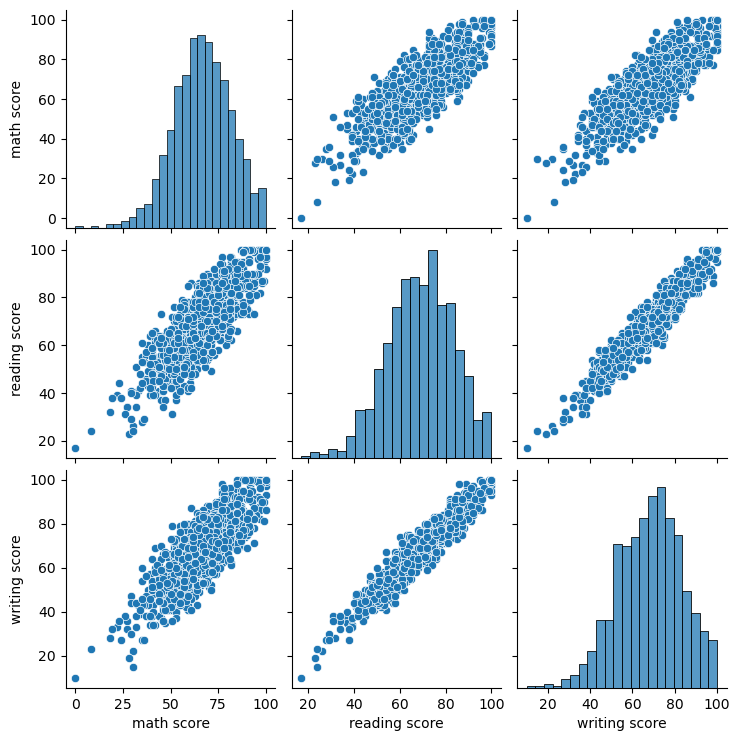

In [7]:
sns.pairplot(data=data, vars=['math score', 'reading score', 'writing score'])
plt.show()


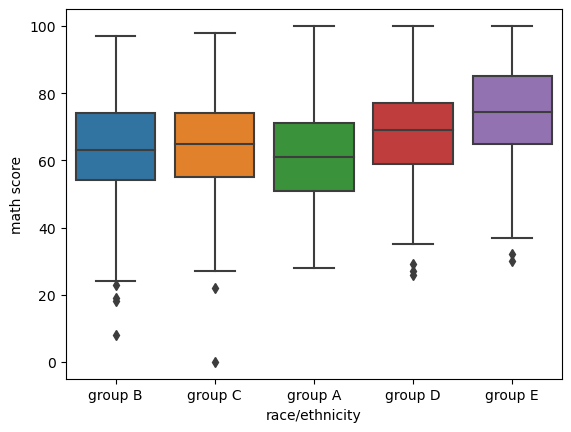

In [8]:
sns.boxplot(data=data, x='race/ethnicity', y='math score')
plt.show()

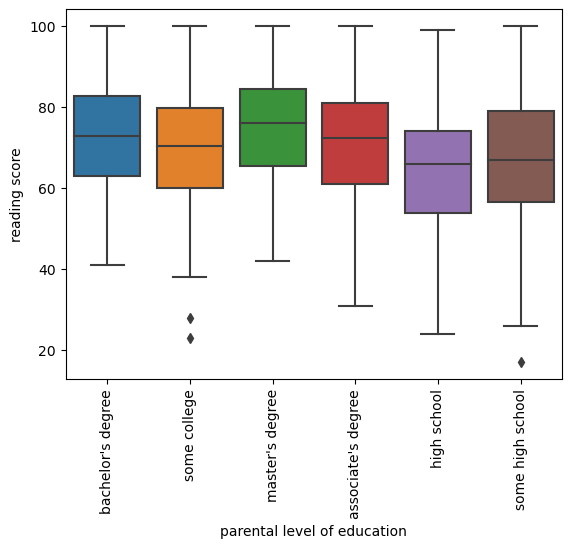

In [10]:
sns.boxplot(data=data, x='parental level of education', y='reading score')
plt.xticks(rotation=90)
plt.show()

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [12]:
label_encoder = LabelEncoder()
categorical_cols = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']
for col in categorical_cols:
    data[col] = label_encoder.fit_transform(data[col])

In [13]:
data['total_score'] = data['math score'] + data['reading score'] + data['writing score']


In [15]:
X = data.drop(['math score', 'reading score', 'writing score'], axis=1)
y = data['math score']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [17]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 12.761316999478417


In [18]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

In [21]:
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(),
    'Support Vector Machine': SVR()
}

best_model = None
best_mse = float('inf')

for model_name, model in models.items():
    print(f"Training and evaluating {model_name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f"Mean Squared Error ({model_name}): {mse}")
    if mse < best_mse:
        best_model = model_name
        best_mse = mse
    print("-----------------------------------")

print(f"The best model is: {best_model} with an MSE of {best_mse}")


Training and evaluating Linear Regression...
Mean Squared Error (Linear Regression): 12.761316999478417
-----------------------------------
Training and evaluating Random Forest...
Mean Squared Error (Random Forest): 20.1022714962415
-----------------------------------
Training and evaluating Support Vector Machine...
Mean Squared Error (Support Vector Machine): 50.656196049420174
-----------------------------------
The best model is: Linear Regression with an MSE of 12.761316999478417


In [23]:
predictions = {}

for model_name, model in models.items():
    print(f"Training and evaluating {model_name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    predictions[model_name] = y_pred
    mse = mean_squared_error(y_test, y_pred)
    print(f"Mean Squared Error ({model_name}): {mse}")
    print("-----------------------------------")

# Create a DataFrame to compare predicted values from different models
comparison_df = pd.DataFrame(predictions)
comparison_df['Actual'] = y_test.values
print(comparison_df)

Training and evaluating Linear Regression...
Mean Squared Error (Linear Regression): 12.761316999478417
-----------------------------------
Training and evaluating Random Forest...
Mean Squared Error (Random Forest): 19.882524023364514
-----------------------------------
Training and evaluating Support Vector Machine...
Mean Squared Error (Support Vector Machine): 50.656196049420174
-----------------------------------
     Linear Regression  Random Forest  Support Vector Machine  Actual
0            82.452139        81.3600               82.788566      91
1            54.955826        55.5600               62.613161      53
2            79.721022        75.6915               72.840599      80
3            76.948191        73.7525               72.525912      74
4            85.338634        86.0500               78.640894      84
..                 ...            ...                     ...     ...
195          46.678048        44.8200               54.645214      52
196          59.99